**MODELO DE CREDIT SCORING**

## 1.- Carga de Librerias

In [1]:
import pandas as pd
import numpy as np

# Graficos
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# Warning
import warnings
warnings.filterwarnings('ignore')

# Modelo ML
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Para feature engineering
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

from feature_engine.encoding import RareLabelEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import WoEEncoder

# Machine Learning Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

## 2.- Carga de la base de datos

In [2]:
df_clase = pd.read_csv(r'C:\Users\richa\OneDrive\Documentos\Cursos\DMC-Credit Scoring\2.- BAS\Base de Datos.csv', sep = ";")
df_clase.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 3.- Entendimiento y Analisis Exploratorio de los datos (EDA)

In [3]:
print("#"+"-"*60)
print("Numero de filas y columnas de la base:")
print(df_clase.shape)
print('\n')
print("#"+"-"*60)
print("Nombre de columnas:")
print(df_clase.columns)
print('\n')
print("#"+"-"*60)
print("Tipo de dato de las columnas:")
print(df_clase.info())

#------------------------------------------------------------
Numero de filas y columnas de la base:
(150000, 12)


#------------------------------------------------------------
Nombre de columnas:
Index(['ID', 'Default', 'Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')


#------------------------------------------------------------
Tipo de dato de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Eda

In [4]:
df_clase['ID'] = df_clase['ID'].astype(str)

Ya están los datos en el tipo de dato según el diccionario. Solo algunos como el Mto_ingreso_mensual y el Nro_dependiente que aparecen aún como float dado que contienen filas vacias.

In [5]:
df_clase.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df_clase.describe()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### 3.1.- Analisis Univariado

# Buen_Pagador: 139974
# Mora >3M: 10026
Bad rate: 0.06684


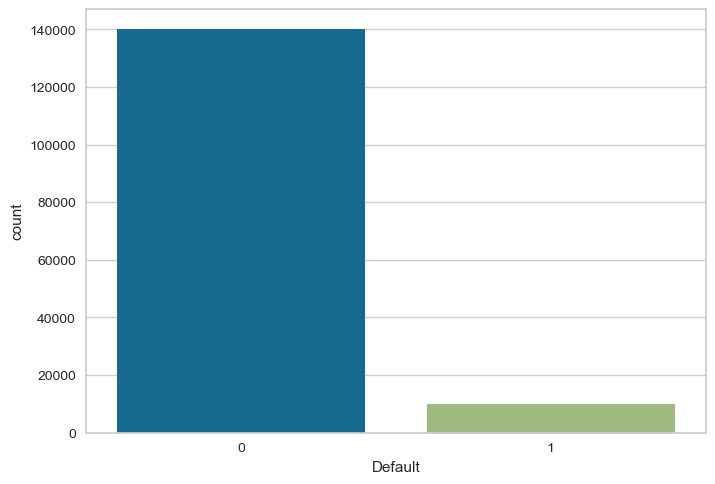

In [7]:
target_count = df_clase['Default'].value_counts()
print('# Buen_Pagador:', target_count[0])
print('# Mora >3M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

sns.countplot(data = df_clase, x = "Default")
plt.show()

#### 3.1.1- Missing

<Axes: >

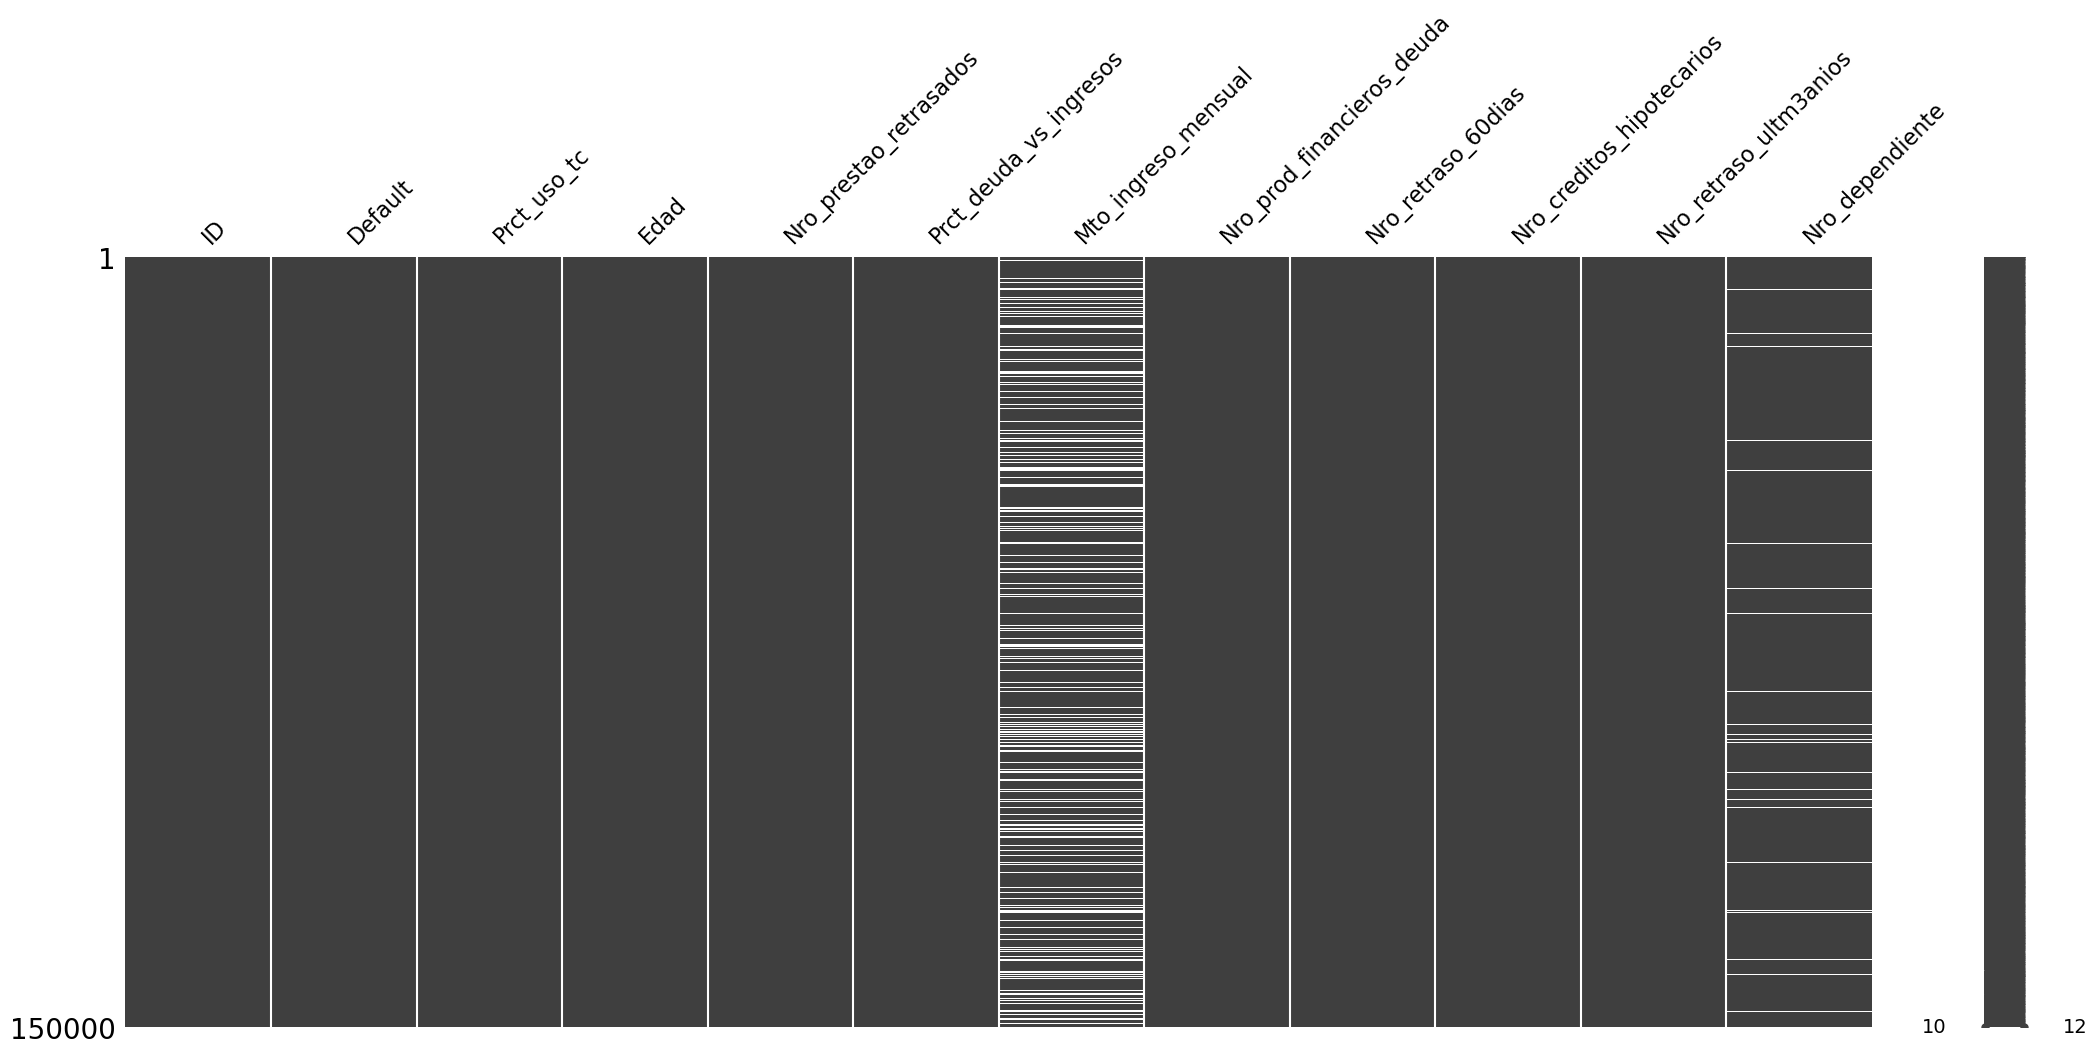

In [9]:
import missingno as msno
msno.matrix(df_clase)

#### 3.1.2.- Outliers

In [8]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != object:
            q1 = stats.scoreatpercentile(df[columna], 25)
            q3 = stats.scoreatpercentile(df[columna], 75)
            iqr = q3-q1
            lim_inf = q1-1.5*iqr
            lim_sup = q3+1.5*iqr
            n_outliers = len(df[(df[columna] < lim_inf) | (df[columna] > lim_sup)])
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
            ))

In [9]:
outliers_col(df_clase)

Default | 10026 | int64
Prct_uso_tc | 763 | float64
Edad | 46 | int64
Nro_prestao_retrasados | 23982 | int64
Prct_deuda_vs_ingresos | 31311 | float64
Mto_ingreso_mensual | 990 | float64
Nro_prod_financieros_deuda | 3980 | int64
Nro_retraso_60dias | 8338 | int64
Nro_creditos_hipotecarios | 793 | int64
Nro_retraso_ultm3anios | 7604 | int64
Nro_dependiente | 13336 | float64


In [88]:
cols_numericas = ['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente']

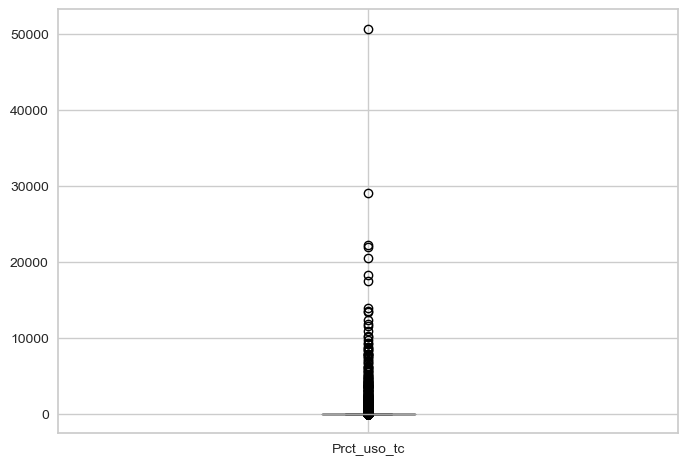

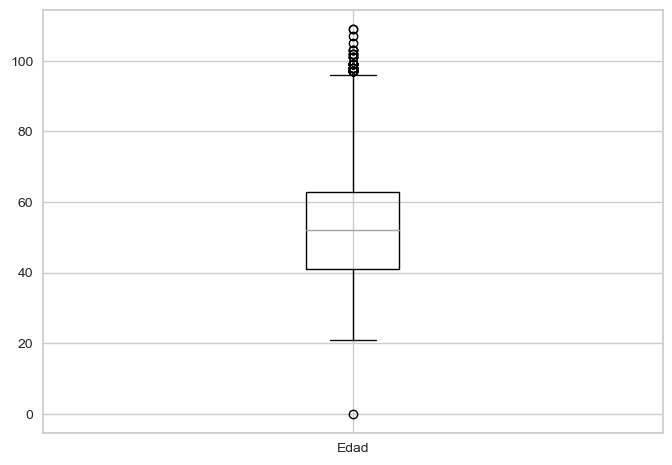

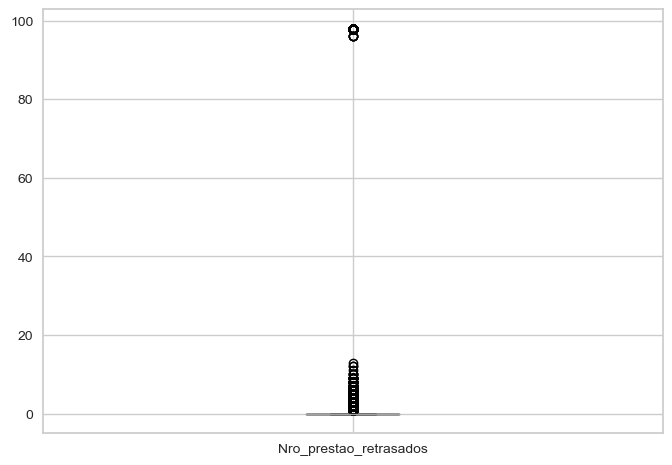

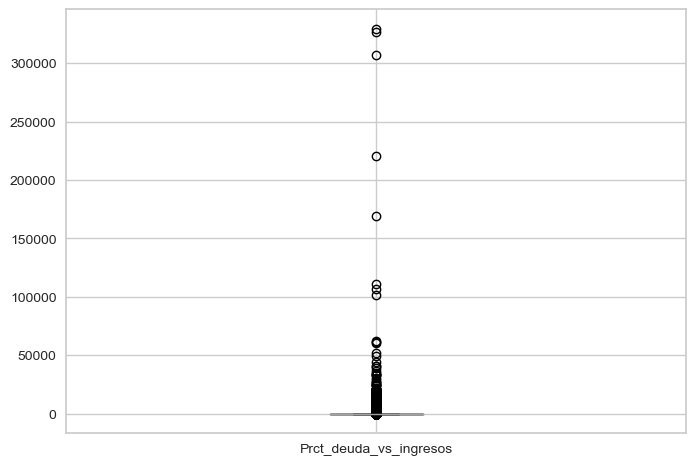

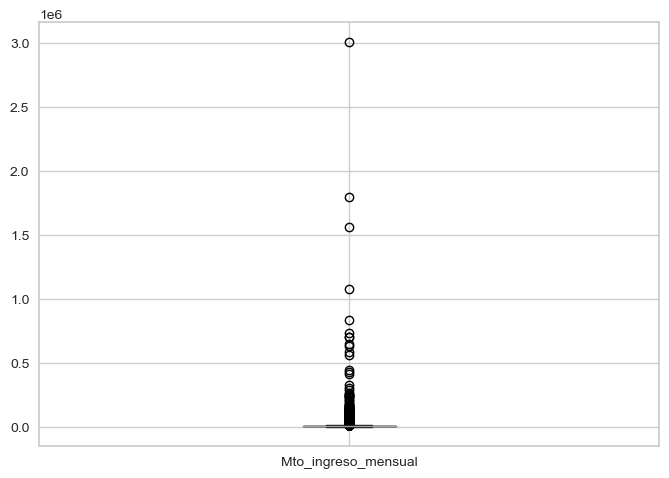

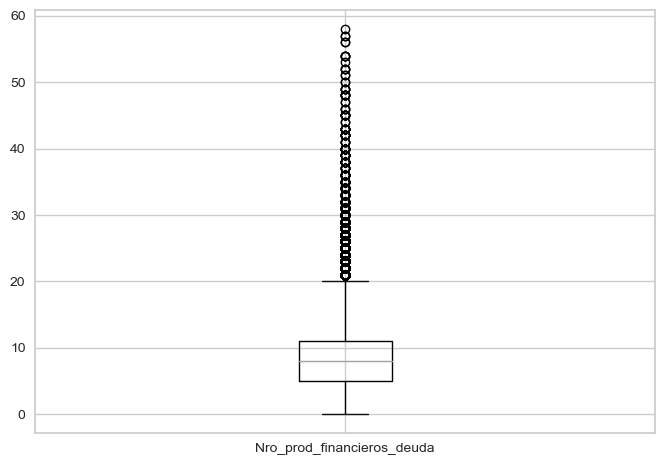

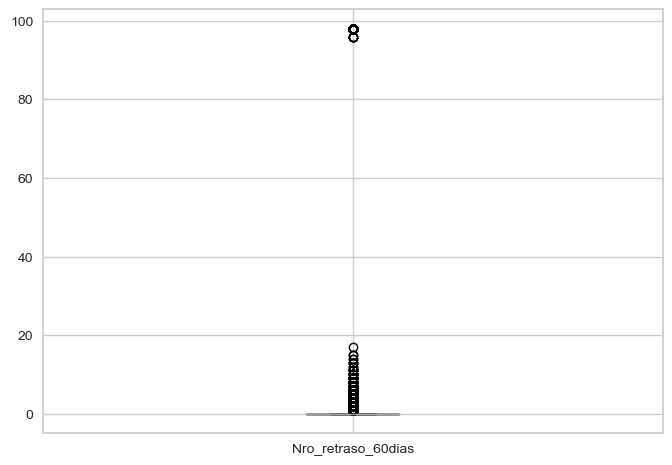

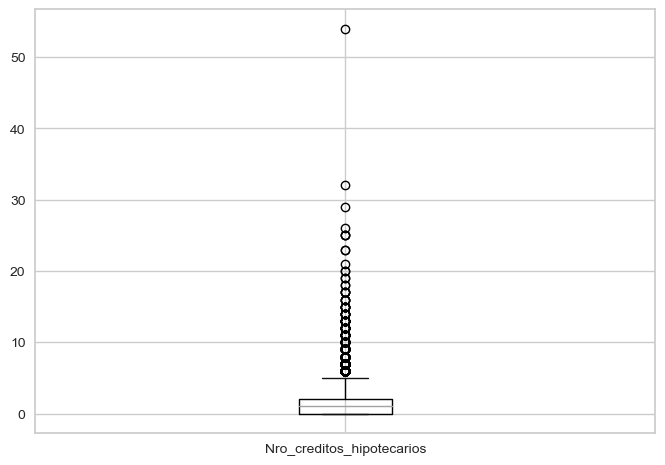

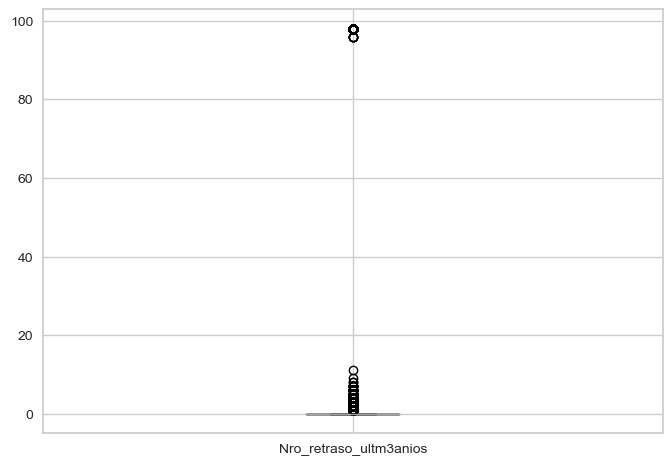

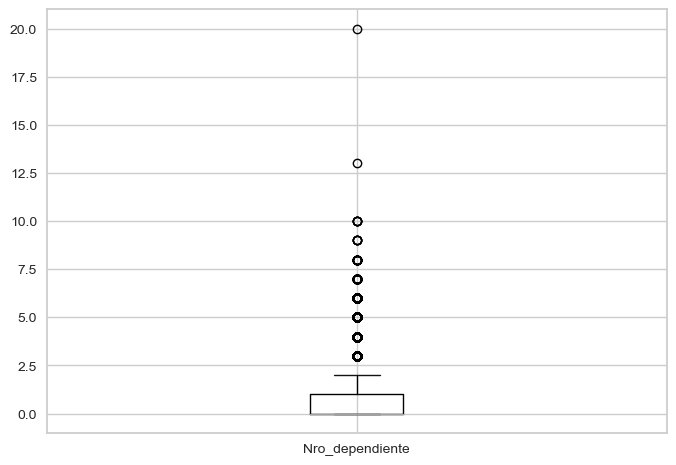

In [90]:
for col in cols_numericas:
    df_clase.boxplot(column=[col]); plt.show()

### 3.2.- Analisis Bivariado

In [13]:
def bivariado_plot_num(df, columna, default, bins):
  aux = df[[default, columna]]
  aux["Var"] = pd.qcut(aux[columna],bins, labels=False)
  aux = aux.groupby("Var")[default].mean().reset_index()
  sns.lineplot(x = 'Var', y = default, data = aux, markers=True, dashes=False)
  plt.xlabel(columna)
  plt.show()

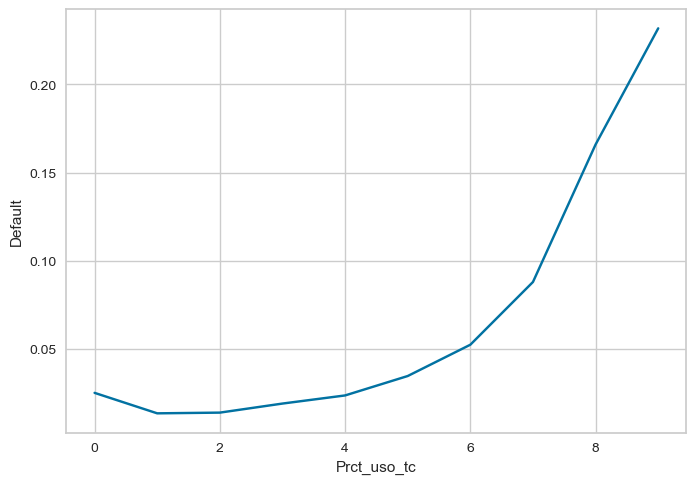

In [14]:
bivariado_plot_num(df_clase,'Prct_uso_tc','Default', 10)

In [15]:
A=pd.qcut(x=df_clase['Prct_uso_tc'],q=10,labels=False)
B=df_clase[['Default', 'Prct_uso_tc']].groupby(A)['Default'].agg(['count','sum','mean']).reset_index()
B.rename(columns={'count':'total','sum':'bads','mean':'bad_rate'},inplace=True)
B

,Prct_uso_tc,total,bads,bad_rate
0,0,15000,378,0.025200
1,1,15000,204,0.013600
2,2,15000,210,0.014000
3,3,15000,287,0.019133
4,4,15000,356,0.023733
5,5,15000,521,0.034733
6,6,15000,787,0.052467
7,7,15000,1320,0.088000
8,8,15000,2488,0.165867
9,9,15000,3475,0.231667


In [113]:
cols_numericas = ['Prct_uso_tc', 'Edad',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda']

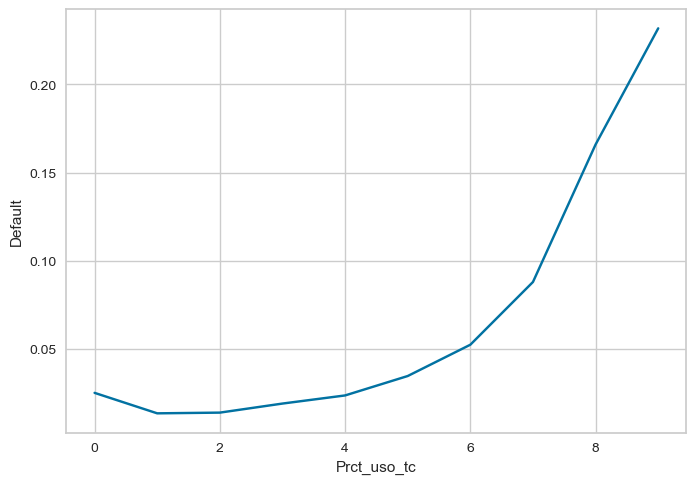

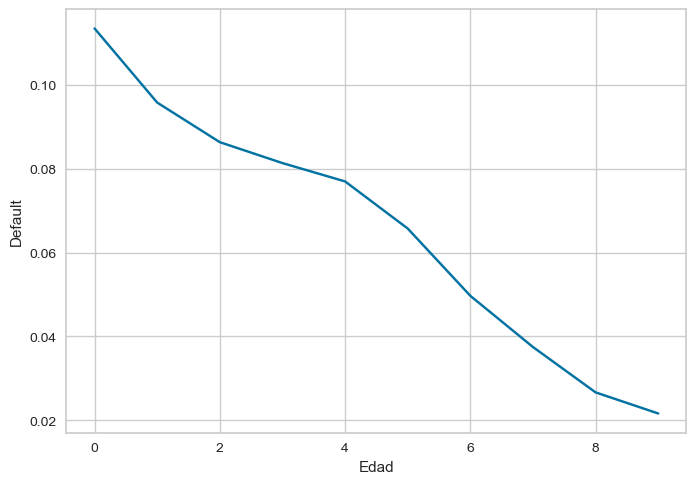

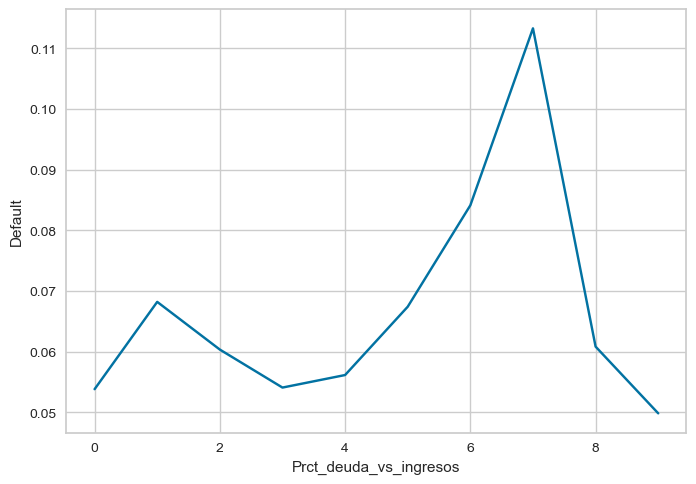

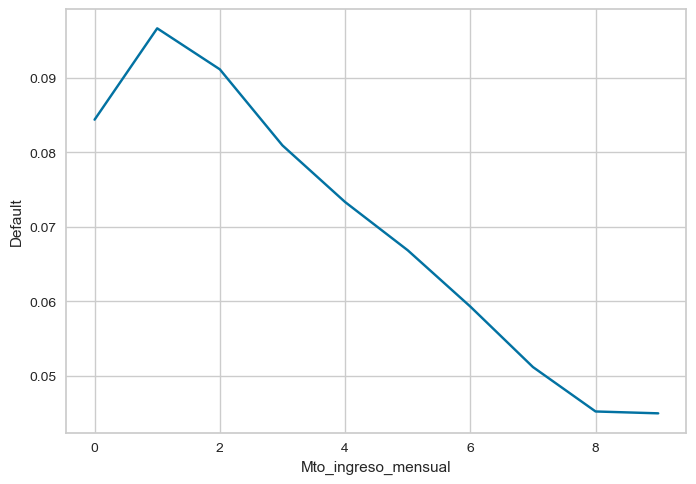

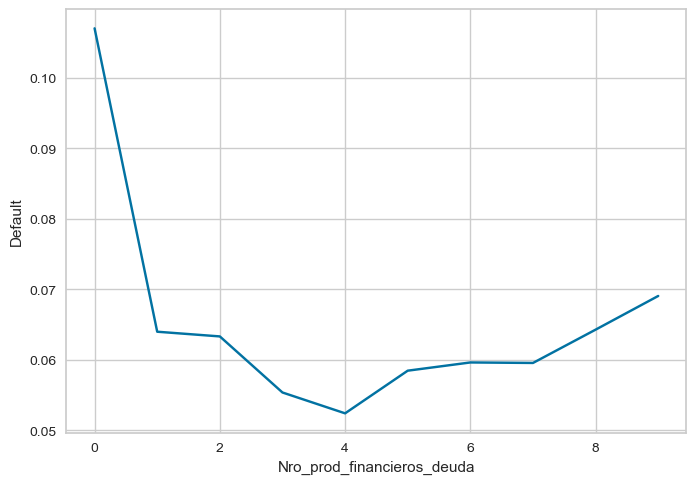

In [114]:
for col in cols_numericas:
    bivariado_plot_num(df_clase,col,'Default', 10); plt.show()
    
    A=pd.qcut(x=df_clase[col],q=5,labels=False)
    B=df_clase[['Default', col]].groupby(A)['Default'].agg(['count','sum','mean']).reset_index()
    B.rename(columns={'count':'total','sum':'bads','mean':'bad_rate'},inplace=True)
    B

### 3.3.- Correlaciones

In [16]:
df_clase.loc[:, 'Default':].corr()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
Default,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
Prct_uso_tc,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
Edad,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
Nro_prestao_retrasados,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
Prct_deuda_vs_ingresos,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
Mto_ingreso_mensual,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
Nro_prod_financieros_deuda,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
Nro_retraso_60dias,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
Nro_creditos_hipotecarios,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
Nro_retraso_ultm3anios,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


## 4.- Feature Engineering

#### Particion Train y Test (considerando estratificación de la variable objetivo)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("Default", axis=1),
    df_clase["Default"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["Default"]
)

print(X_train.shape, X_test.shape)

(105000, 11) (45000, 11)


In [18]:
# Comprobación de la proporción de Y en train
print('Proporcion en train: {}'.format(y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])))
# Comprobación de la proporción de Y en test
print('Proporcion en test: {}'.format(y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])))

Proporcion en train: 0.06683809523809524
Proporcion en test: 0.06684444444444444


In [19]:
# Revisión de la proporción de nulos por variable
X_train.isnull().mean().where(X_train.isnull().mean()>0)

ID                                 NaN
Prct_uso_tc                        NaN
Edad                               NaN
Nro_prestao_retrasados             NaN
Prct_deuda_vs_ingresos             NaN
Mto_ingreso_mensual           0.197705
Nro_prod_financieros_deuda         NaN
Nro_retraso_60dias                 NaN
Nro_creditos_hipotecarios          NaN
Nro_retraso_ultm3anios             NaN
Nro_dependiente               0.026429
dtype: float64

#### Variables numéricas

In [20]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

Prct_uso_tc                        NaN
Edad                               NaN
Nro_prestao_retrasados             NaN
Prct_deuda_vs_ingresos             NaN
Mto_ingreso_mensual           0.197705
Nro_prod_financieros_deuda         NaN
Nro_retraso_60dias                 NaN
Nro_creditos_hipotecarios          NaN
Nro_retraso_ultm3anios             NaN
Nro_dependiente               0.026429
dtype: float64

#### Variables categoricas

La data no contiene variables categóricas (El ID no cuenta)

### 4.1.- Tratamiento de missing

In [21]:
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual', 'Nro_prod_financieros_deuda', 'Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente'])
        )
    ]
)

In [22]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['Prct_uso_tc', 'Edad',
                                              'Nro_prestao_retrasados',
                                              'Prct_deuda_vs_ingresos',
                                              'Mto_ingreso_mensual',
                                              'Nro_prod_financieros_deuda',
                                              'Nro_retraso_60dias',
                                              'Nro_creditos_hipotecarios',
                                              'Nro_retraso_ultm3anios',
                                              'Nro_dependiente']))])

In [23]:
pipe_2.named_steps["median_imputer"].imputer_dict_

{'Prct_uso_tc': 0.1539837645,
 'Edad': 52.0,
 'Nro_prestao_retrasados': 0.0,
 'Prct_deuda_vs_ingresos': 0.3669227135,
 'Mto_ingreso_mensual': 5400.0,
 'Nro_prod_financieros_deuda': 8.0,
 'Nro_retraso_60dias': 0.0,
 'Nro_creditos_hipotecarios': 1.0,
 'Nro_retraso_ultm3anios': 0.0,
 'Nro_dependiente': 0.0}

In [24]:
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [25]:
X_train_t.isnull().mean()

ID                            0.0
Prct_uso_tc                   0.0
Edad                          0.0
Nro_prestao_retrasados        0.0
Prct_deuda_vs_ingresos        0.0
Mto_ingreso_mensual           0.0
Nro_prod_financieros_deuda    0.0
Nro_retraso_60dias            0.0
Nro_creditos_hipotecarios     0.0
Nro_retraso_ultm3anios        0.0
Nro_dependiente               0.0
dtype: float64

In [26]:
X_test_t.isnull().mean()

ID                            0.0
Prct_uso_tc                   0.0
Edad                          0.0
Nro_prestao_retrasados        0.0
Prct_deuda_vs_ingresos        0.0
Mto_ingreso_mensual           0.0
Nro_prod_financieros_deuda    0.0
Nro_retraso_60dias            0.0
Nro_creditos_hipotecarios     0.0
Nro_retraso_ultm3anios        0.0
Nro_dependiente               0.0
dtype: float64

### 4.3- Feature Selection

Ahora determinaremos el aporte de las variables en función del IV

In [27]:
tot_train = pd.concat([X_train_t, y_train], axis=1)
tot_train.head()

,ID,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Default
70904,70905,0.066554,61,0,0.207773,4090.0,9,0,1,0,1.0,0
63717,63718,0.006597,68,0,6.000000,5400.0,9,0,0,0,0.0,0
88897,88898,0.646088,34,0,0.283652,5125.0,6,0,0,0,0.0,0
56330,56331,0.000000,61,0,24.000000,5400.0,2,0,0,0,0.0,0
84825,84826,0.164887,51,0,0.400920,5000.0,11,1,2,0,3.0,0


In [28]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [29]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

**Funcion para generar reporte de los IV de todas las variables**

In [30]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

In [31]:
X_train_t.select_dtypes(include=['number']).columns

Index(['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente'],
      dtype='object')

In [32]:
num_cols=['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
       'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
       'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
       'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
       'Nro_dependiente']

**Discretizamos para luego encontrar el IV de las variables**

In [33]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=num_cols,
                                  return_boundaries=True,)
disc1.fit(X_train_t[num_cols])

EqualFrequencyDiscretiser(return_boundaries=True,
                          variables=['Prct_uso_tc', 'Edad',
                                     'Nro_prestao_retrasados',
                                     'Prct_deuda_vs_ingresos',
                                     'Mto_ingreso_mensual',
                                     'Nro_prod_financieros_deuda',
                                     'Nro_retraso_60dias',
                                     'Nro_creditos_hipotecarios',
                                     'Nro_retraso_ultm3anios',
                                     'Nro_dependiente'])

In [34]:
X_train_t_numdisc=disc1.transform(X_train_t[num_cols])
X_test_t_numdisc=disc1.transform(X_test_t[num_cols])

In [35]:
X_train_t_numdisc.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
70904,"(0.0433, 0.0828]","(60.0, 65.0]","(-inf, 1.0]","(0.135, 0.214]","(3400.0, 4333.0]","(8.0, 9.0]","(-inf, inf]","(-inf, 1.0]","(-inf, inf]","(-inf, 1.0]"
63717,"(0.00291, 0.0192]","(65.0, 72.0]","(-inf, 1.0]","(4.0, 1255.0]","(5392.0, 5400.0]","(8.0, 9.0]","(-inf, inf]","(-inf, 1.0]","(-inf, inf]","(-inf, 1.0]"
88897,"(0.443, 0.697]","(33.0, 39.0]","(-inf, 1.0]","(0.214, 0.288]","(4333.0, 5392.0]","(5.0, 6.0]","(-inf, inf]","(-inf, 1.0]","(-inf, inf]","(-inf, 1.0]"
56330,"(-inf, 0.00291]","(60.0, 65.0]","(-inf, 1.0]","(4.0, 1255.0]","(5392.0, 5400.0]","(-inf, 3.0]","(-inf, inf]","(-inf, 1.0]","(-inf, inf]","(-inf, 1.0]"
84825,"(0.154, 0.271]","(48.0, 52.0]","(-inf, 1.0]","(0.367, 0.467]","(4333.0, 5392.0]","(10.0, 12.0]","(-inf, inf]","(1.0, 2.0]","(-inf, inf]","(2.0, inf]"


**Veamos cuales son las variables numéricas más importantes basado en su IV**

In [36]:
tot_train_t2=pd.concat([X_train_t_numdisc, y_train], axis=1)
tot_train_t2.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Default
70904,"(0.0433, 0.0828]","(60.0, 65.0]","(-inf, 1.0]","(0.135, 0.214]","(3400.0, 4333.0]","(8.0, 9.0]","(-inf, inf]","(-inf, 1.0]","(-inf, inf]","(-inf, 1.0]",0
63717,"(0.00291, 0.0192]","(65.0, 72.0]","(-inf, 1.0]","(4.0, 1255.0]","(5392.0, 5400.0]","(8.0, 9.0]","(-inf, inf]","(-inf, 1.0]","(-inf, inf]","(-inf, 1.0]",0
88897,"(0.443, 0.697]","(33.0, 39.0]","(-inf, 1.0]","(0.214, 0.288]","(4333.0, 5392.0]","(5.0, 6.0]","(-inf, inf]","(-inf, 1.0]","(-inf, inf]","(-inf, 1.0]",0
56330,"(-inf, 0.00291]","(60.0, 65.0]","(-inf, 1.0]","(4.0, 1255.0]","(5392.0, 5400.0]","(-inf, 3.0]","(-inf, inf]","(-inf, 1.0]","(-inf, inf]","(-inf, 1.0]",0
84825,"(0.154, 0.271]","(48.0, 52.0]","(-inf, 1.0]","(0.367, 0.467]","(4333.0, 5392.0]","(10.0, 12.0]","(-inf, inf]","(1.0, 2.0]","(-inf, inf]","(2.0, inf]",0


In [37]:
IV_v, ReporteWoe_v=calculate_woe_iv(tot_train_t2, "Prct_uso_tc", "Default")
IV_v

1.110944212555131

In [38]:
ReporteWoe_v

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
8,"(0.981, inf]",10500,8062,2438,0.082280,0.347392,-1.440322,0.381847
7,"(0.697, 0.981]",10500,8779,1721,0.089598,0.245227,-1.006849,0.156694
2,"(0.443, 0.697]",10500,9568,932,0.097651,0.132801,-0.307459,0.010807
5,"(0.271, 0.443]",10500,9941,559,0.101457,0.079652,0.241968,0.005276
4,"(0.154, 0.271]",10500,10128,372,0.103366,0.053007,0.667860,0.033633
9,"(0.0828, 0.154]",10500,10242,258,0.104529,0.036763,1.044987,0.070815
3,"(-inf, 0.00291]",10500,10252,248,0.104631,0.035338,1.085494,0.075218
0,"(0.0433, 0.0828]",10500,10312,188,0.105244,0.026788,1.368316,0.107352
6,"(0.0192, 0.0433]",10500,10332,168,0.105448,0.023938,1.482732,0.120857
1,"(0.00291, 0.0192]",10500,10366,134,0.105795,0.019094,1.712141,0.148445


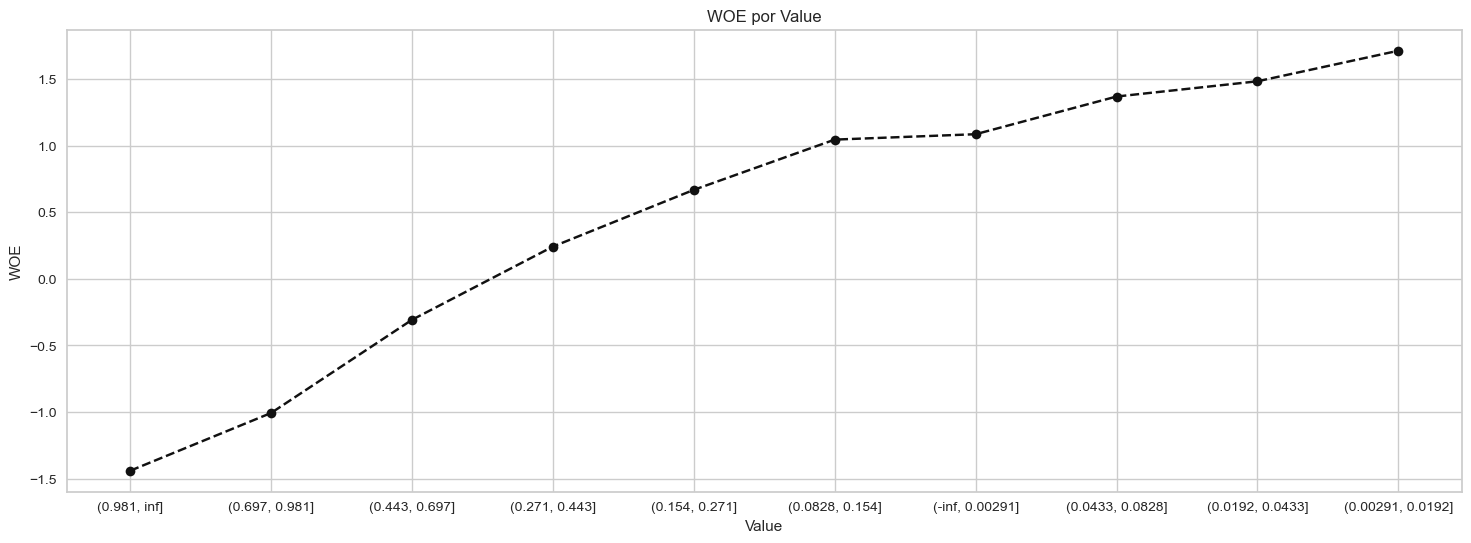

In [39]:
plot_by_woe(ReporteWoe_v)

**Generamos un reporte con todos los IVs**

In [40]:
getFeatureIV_Importance(tot_train_t2,num_cols,"Default")

,Feature,IV
0,Prct_uso_tc,1.110944
2,Nro_prestao_retrasados,0.458671
1,Edad,0.252157
4,Mto_ingreso_mensual,0.073897
3,Prct_deuda_vs_ingresos,0.072693
5,Nro_prod_financieros_deuda,0.064638
9,Nro_dependiente,0.020714
7,Nro_creditos_hipotecarios,0.013098
6,Nro_retraso_60dias,0.000000
8,Nro_retraso_ultm3anios,0.000000


**Nos quedamos solo con las variables numéricas con IV mayor a 2%**

In [41]:
num_cols_2=['Prct_uso_tc','Nro_prestao_retrasados','Edad','Mto_ingreso_mensual', 
            'Prct_deuda_vs_ingresos', 'Nro_prod_financieros_deuda', 'Nro_dependiente']

### 4.4.- Tratamiento de Outliers y Escalado de variables

In [42]:
X_train_t.head()

,ID,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
70904,70905,0.066554,61,0,0.207773,4090.0,9,0,1,0,1.0
63717,63718,0.006597,68,0,6.000000,5400.0,9,0,0,0,0.0
88897,88898,0.646088,34,0,0.283652,5125.0,6,0,0,0,0.0
56330,56331,0.000000,61,0,24.000000,5400.0,2,0,0,0,0.0
84825,84826,0.164887,51,0,0.400920,5000.0,11,1,2,0,3.0


#### 4.4.1- Outliers

In [43]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Prct_uso_tc,105000.0,5.819674,257.063237,0.0,0.029666,0.153984,0.556816,50708.0
Edad,105000.0,52.257333,14.757197,0.0,41.000000,52.000000,63.000000,109.0
Nro_prestao_retrasados,105000.0,0.418276,4.166897,0.0,0.000000,0.000000,0.000000,98.0
Prct_deuda_vs_ingresos,105000.0,349.751674,2006.431906,0.0,0.175941,0.366923,0.864635,326442.0
Mto_ingreso_mensual,105000.0,6436.742343,13809.333102,0.0,3916.000000,5400.000000,7383.000000,3008750.0
Nro_prod_financieros_deuda,105000.0,8.449914,5.153014,0.0,5.000000,8.000000,11.000000,58.0
Nro_retraso_60dias,105000.0,0.263886,4.143683,0.0,0.000000,0.000000,0.000000,98.0
Nro_creditos_hipotecarios,105000.0,1.020057,1.136004,0.0,0.000000,1.000000,2.000000,54.0
Nro_retraso_ultm3anios,105000.0,0.237390,4.128927,0.0,0.000000,0.000000,0.000000,98.0
Nro_dependiente,105000.0,0.739590,1.110803,0.0,0.000000,0.000000,1.000000,20.0


In [44]:
capper = Winsorizer(
    variables=num_cols,
    capping_method="quantiles",
    #capping_method="iqr",
    tail="right",
    fold=0.01,
    #fold=1.5,  # Este valor ajusta cuánto se extiende el rango intercuartílico
)
capper.fit(X_train_t)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados',
                      'Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual',
                      'Nro_prod_financieros_deuda', 'Nro_retraso_60dias',
                      'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios',
                      'Nro_dependiente'])

In [45]:
capper.right_tail_caps_

{'Prct_uso_tc': 1.0920966371999994,
 'Edad': 87.0,
 'Nro_prestao_retrasados': 4.0,
 'Prct_deuda_vs_ingresos': 4949.0199999999895,
 'Mto_ingreso_mensual': 23200.0,
 'Nro_prod_financieros_deuda': 25.0,
 'Nro_retraso_60dias': 3.0,
 'Nro_creditos_hipotecarios': 5.0,
 'Nro_retraso_ultm3anios': 2.0,
 'Nro_dependiente': 4.0}

In [46]:
X_train_t = capper.transform(X_train_t)
X_test_t = capper.transform(X_test_t)

In [47]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Prct_uso_tc,105000.0,0.319791,0.351703,0.0,0.029666,0.153984,0.556816,1.092097
Edad,105000.0,52.227695,14.681720,0.0,41.000000,52.000000,63.000000,87.000000
Nro_prestao_retrasados,105000.0,0.245352,0.666245,0.0,0.000000,0.000000,0.000000,4.000000
Prct_deuda_vs_ingresos,105000.0,313.921298,900.998051,0.0,0.175941,0.366923,0.864635,4949.020000
Mto_ingreso_mensual,105000.0,6142.005857,3842.096980,0.0,3916.000000,5400.000000,7383.000000,23200.000000
Nro_prod_financieros_deuda,105000.0,8.410267,4.983148,0.0,5.000000,8.000000,11.000000,25.000000
Nro_retraso_60dias,105000.0,0.086419,0.402681,0.0,0.000000,0.000000,0.000000,3.000000
Nro_creditos_hipotecarios,105000.0,1.003752,1.019410,0.0,0.000000,1.000000,2.000000,5.000000
Nro_retraso_ultm3anios,105000.0,0.062552,0.287671,0.0,0.000000,0.000000,0.000000,2.000000
Nro_dependiente,105000.0,0.730105,1.072867,0.0,0.000000,0.000000,1.000000,4.000000


In [48]:
X_train_t.head()

,ID,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
70904,70905,0.066554,61,0,0.207773,4090.0,9,0,1,0,1.0
63717,63718,0.006597,68,0,6.000000,5400.0,9,0,0,0,0.0
88897,88898,0.646088,34,0,0.283652,5125.0,6,0,0,0,0.0
56330,56331,0.000000,61,0,24.000000,5400.0,2,0,0,0,0.0
84825,84826,0.164887,51,0,0.400920,5000.0,11,1,2,0,3.0


#### 4.4.2.- Escalado de variables

In [49]:
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t[num_cols])
X_train_t_numoutscal = scaler.transform(X_train_t[num_cols])
X_test_t_numoutscal = scaler.transform(X_test_t[num_cols])

In [50]:
X_train_t_numoutscal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Prct_uso_tc,105000.0,0.314536,0.667179,-0.292107,-0.235830,-2.632610e-17,0.764170,1.779596
Edad,105000.0,0.010350,0.667351,-2.363636,-0.500000,0.000000e+00,0.500000,1.590909
Nro_prestao_retrasados,105000.0,0.245352,0.666245,0.000000,0.000000,0.000000e+00,0.000000,4.000000
Prct_deuda_vs_ingresos,105000.0,455.288197,1308.269985,-0.532780,-0.277310,0.000000e+00,0.722690,7185.558594
Mto_ingreso_mensual,105000.0,0.214020,1.108191,-1.557543,-0.428036,0.000000e+00,0.571964,5.134122
Nro_prod_financieros_deuda,105000.0,0.068378,0.830525,-1.333333,-0.500000,0.000000e+00,0.500000,2.833333
Nro_retraso_60dias,105000.0,0.086419,0.402681,0.000000,0.000000,0.000000e+00,0.000000,3.000000
Nro_creditos_hipotecarios,105000.0,0.001876,0.509705,-0.500000,-0.500000,0.000000e+00,0.500000,2.000000
Nro_retraso_ultm3anios,105000.0,0.062552,0.287671,0.000000,0.000000,0.000000e+00,0.000000,2.000000
Nro_dependiente,105000.0,0.730105,1.072867,0.000000,0.000000,0.000000e+00,1.000000,4.000000


In [51]:
X_train_t=pd.concat([X_train_t_numoutscal], axis=1)
X_test_t=pd.concat([X_test_t_numoutscal], axis=1)

In [52]:
X_train_t.head()

,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
70904,-0.165854,0.409091,0.0,-0.231089,-0.377848,0.166667,0.0,0.0,0.0,1.0
63717,-0.279592,0.727273,0.0,8.179358,0.000000,0.166667,0.0,-0.5,0.0,0.0
88897,0.933520,-0.818182,0.0,-0.120911,-0.079319,-0.333333,0.0,-0.5,0.0,0.0
56330,-0.292107,0.409091,0.0,34.315774,0.000000,-1.000000,0.0,-0.5,0.0,0.0
84825,0.020684,-0.045455,0.0,0.049365,-0.115374,0.500000,1.0,0.5,0.0,3.0


### 4.5.- Correlaciones

Verifiquemos si existe correlación entre las variables predictoras que hemos elegido

In [53]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [54]:
X_train_t2=pd.concat([X_train_t[num_cols_2]], axis=1)
X_train_t2.head()

,Prct_uso_tc,Nro_prestao_retrasados,Edad,Mto_ingreso_mensual,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_dependiente
70904,-0.165854,0.0,0.409091,-0.377848,-0.231089,0.166667,1.0
63717,-0.279592,0.0,0.727273,0.000000,8.179358,0.166667,0.0
88897,0.933520,0.0,-0.818182,-0.079319,-0.120911,-0.333333,0.0
56330,-0.292107,0.0,0.409091,0.000000,34.315774,-1.000000,0.0
84825,0.020684,0.0,-0.045455,-0.115374,0.049365,0.500000,3.0


In [55]:
corr_features = correlation(X_train_t2, 0.8)
len(set(corr_features))

0

De manera alternativa usaremos las variables numéricas discretizadas y codificadas

In [56]:
encoder_4 = WoEEncoder(variables=num_cols_2,
                       fill_value=0) #ignore_format=False
encoder_4.fit(X_train_t_numdisc[num_cols_2], y_train)

WoEEncoder(fill_value=0,
           variables=['Prct_uso_tc', 'Nro_prestao_retrasados', 'Edad',
                      'Mto_ingreso_mensual', 'Prct_deuda_vs_ingresos',
                      'Nro_prod_financieros_deuda', 'Nro_dependiente'])

In [57]:
X_train_woe_enc2 = encoder_4.transform(X_train_t_numdisc[num_cols_2])
X_test_woe_enc2 = encoder_4.transform(X_test_t_numdisc[num_cols_2])

In [58]:
X_train_woe_enc2.head()

,Prct_uso_tc,Nro_prestao_retrasados,Edad,Mto_ingreso_mensual,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda,Nro_dependiente
70904,-1.368316,-0.252836,-0.544864,0.212753,-0.120307,-0.133759,-0.079754
63717,-1.712141,-0.252836,-0.933279,-0.196706,-0.109001,-0.133759,-0.079754
88897,0.307459,-0.252836,0.384485,0.139121,-0.226953,-0.214768,-0.079754
56330,-1.085494,-0.252836,-0.544864,-0.196706,-0.109001,0.498621,-0.079754
84825,-0.667860,-0.252836,0.132900,0.139121,0.001831,-0.112815,0.325626


## 5.- Entrenamiento del Modelo

### Regresion Logistica

In [68]:
logit = LogisticRegression()
logit.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)
pred_train_logit = logit.predict_proba(pd.concat([X_train_t_numoutscal],axis=1))
pred_test_logit = logit.predict_proba(pd.concat([X_test_t_numoutscal],axis=1))
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit[:,1])))

Train set
Logistic regression roc-auc: 0.8516972148861722
Test set
Logistic regression roc-auc: 0.8527270494848562


### Random Forest

In [64]:
rf = RandomForestClassifier(n_estimators=300, random_state=39)
rf.fit(pd.concat([X_train_t_numoutscal],axis=1),y_train)
pred_train_rf = rf.predict_proba(pd.concat([X_train_t_numoutscal],axis=1))
pred_test_rf = rf.predict_proba(pd.concat([X_test_t_numoutscal],axis=1))
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

Train set
Random Forests roc-auc: 0.9999844547493932
Test set
Random Forests roc-auc: 0.8491008917795384


### Gradient Boosting

In [67]:
gbc = GradientBoostingClassifier(n_estimators=300, random_state=44)
gbc.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)
pred_train_gbc = gbc.predict_proba(pd.concat([X_train_t_numoutscal],axis=1))
pred_test_gbc = gbc.predict_proba(pd.concat([X_test_t_numoutscal],axis=1))
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train_gbc[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.8776775292632453
Test set
Gradient Boosted Trees roc-auc: 0.8665930510320101


**El modelo de Gradient Boosting tiene buenas métricas train y test y es estable**

### 5.1.- Random Forest

**Evaluemos la sensibilidad de sus principales hipérparametros**

#### Numero de arboles

In [69]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],
#     max_depth=[1, 2, 3, 4, 5],
#     min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'n_estimators': 200}

In [70]:
results = pd.DataFrame(search.cv_results_)[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'n_estimators': 10},0.999646,0.000035,0.779454,0.009442
1,{'n_estimators': 20},0.999934,0.000017,0.805329,0.011405
2,{'n_estimators': 50},0.999972,0.000011,0.828677,0.011616
3,{'n_estimators': 100},0.999979,0.000009,0.838632,0.010023
4,{'n_estimators': 200},0.999983,0.000007,0.844491,0.009304


Text(0.5, 0, 'n_estimators')

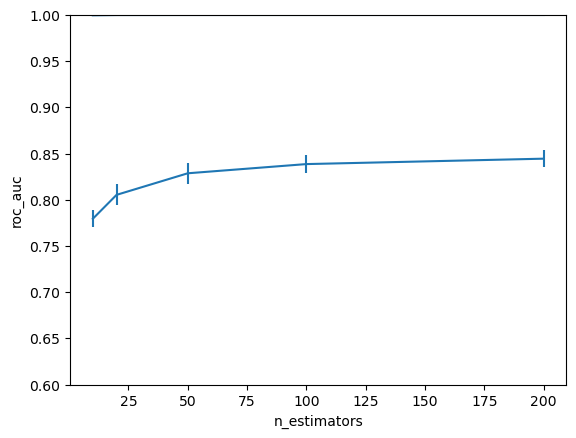

In [71]:
# plot results
results.index = rf_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')
plt.show()

#### Maxima Profundidad

In [89]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
#     n_estimators=[10, 20, 50, 100, 200],
      max_depth=[1, 2, 3, 4, 5],
#     min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'max_depth': 5}

In [90]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'max_depth': 1},0.839378,0.001589,0.838957,0.006888
1,{'max_depth': 2},0.849297,0.001542,0.848436,0.006971
2,{'max_depth': 3},0.854817,0.001400,0.853407,0.006704
3,{'max_depth': 4},0.858628,0.001601,0.856805,0.007137
4,{'max_depth': 5},0.861493,0.001655,0.858133,0.007392


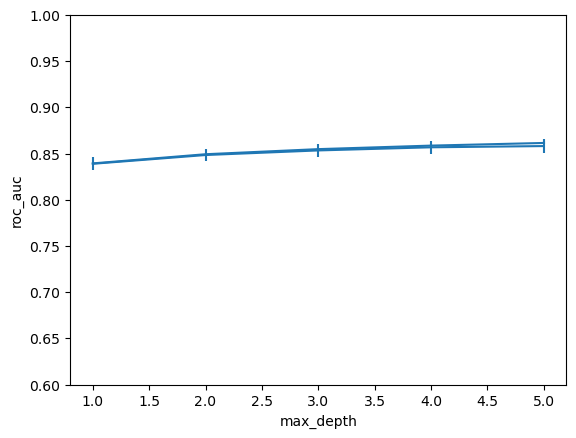

In [91]:
# plot results
results.index = rf_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')
plt.show()

#### Número mínimo de observaciones para partir el nodo

In [92]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
#     n_estimators=[10, 20, 50, 100, 200],
#     max_depth=[1, 2, 3, 4, 5],
      min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'min_samples_split': 0.01}

In [93]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'min_samples_split': 0.01},0.892851,0.001328,0.862923,0.007352
1,{'min_samples_split': 0.05},0.865889,0.001519,0.858915,0.006931
2,{'min_samples_split': 0.1},0.859654,0.001797,0.856725,0.007141
3,{'min_samples_split': 0.2},0.855332,0.001571,0.853597,0.007064
4,{'min_samples_split': 0.3},0.854065,0.001707,0.852648,0.006726
5,{'min_samples_split': 0.5},0.848548,0.001989,0.847587,0.006248


Text(0.5, 0, 'min_samples_split')

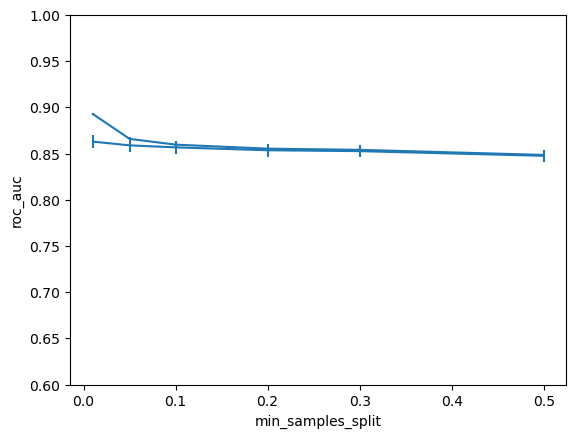

In [94]:
# plot results
results.index = rf_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

#### RandomSearch para mejor combinacion

Por tiempos de entrenamiento probaremos Random y no Grid

In [97]:
# set up the model
rf = RandomForestClassifier(random_state=39)
# hyperparameter space
rf_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )
# search
reg_rf = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_rf = reg_rf.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search_rf.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [98]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.856754,0.001480,0.855506,0.006905
1,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.854902,0.001420,0.853523,0.006682
2,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.854304,0.001363,0.853097,0.006878
3,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.853879,0.001419,0.852705,0.006802
4,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.853682,0.001532,0.852536,0.006493
5,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.852882,0.001536,0.851733,0.006979
6,"{'max_depth': 4, 'min_samples_split': 0.309778...",0.852935,0.001526,0.851703,0.007104
7,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.852789,0.001618,0.851672,0.006942
8,"{'max_depth': 4, 'min_samples_split': 0.377440...",0.851649,0.001772,0.850718,0.007048
9,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.851783,0.001258,0.850708,0.007137


Text(0.5, 0, 'Hyperparameter space')

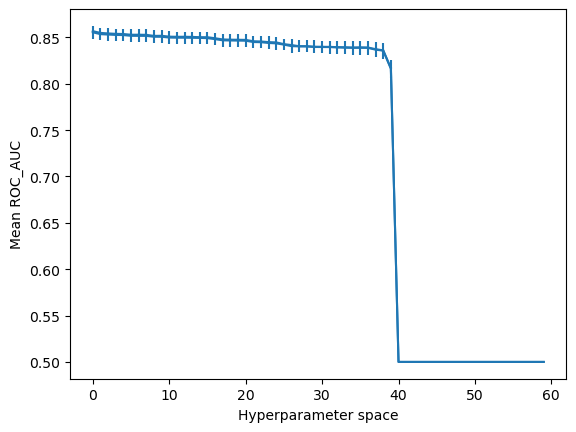

In [99]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

**Evaluemos el modelo con los mejores hiperparametros encontrados**

In [101]:
# Lo dejamos entrenado con los parámetros hallados
rf = RandomForestClassifier(max_depth= 4, min_samples_split=0.07685550174624711, n_estimators=155, random_state=39)
rf.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)
pred_train_rf = rf.predict_proba(pd.concat([X_train_t_numoutscal],axis=1))
pred_test_rf = rf.predict_proba(pd.concat([X_test_t_numoutscal],axis=1))
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]))

Train roc_auc:  0.8564755009148162
Test roc_auc:  0.8572507193619453


### 5.2.- Gradient Boosting

**Evaluemos la sensibilidad de sus principales hipérparametros**

#### Numero de arboles

In [103]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 150],
    #min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'n_estimators': 150}

In [104]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'n_estimators': 10},0.844764,0.001261,0.843312,0.008313
1,{'n_estimators': 20},0.854107,0.001922,0.852191,0.007886
2,{'n_estimators': 50},0.865504,0.001761,0.861399,0.006686
3,{'n_estimators': 100},0.870392,0.001575,0.863609,0.006464
4,{'n_estimators': 150},0.873240,0.001618,0.863745,0.006392


Text(0.5, 0, 'n_estimators')

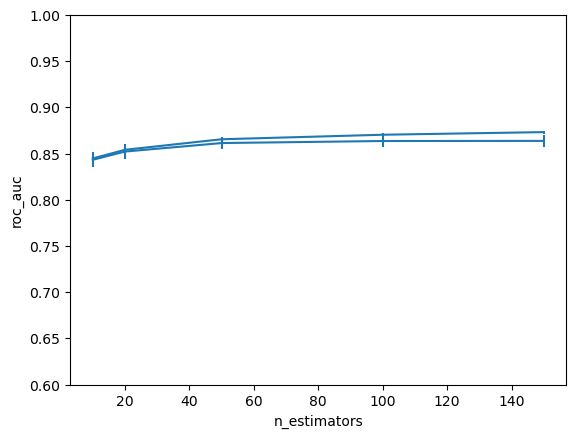

In [105]:
# plot results
results.index = gbc_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Profundidad

In [106]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    #n_estimators=[10, 20, 50, 100, 200],
    #min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'max_depth': 4}

In [107]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'max_depth': 1},0.859049,0.001674,0.857763,0.006380
1,{'max_depth': 2},0.865611,0.001371,0.862153,0.006468
2,{'max_depth': 3},0.870392,0.001575,0.863609,0.006464
3,{'max_depth': 4},0.876319,0.001581,0.864060,0.006657
4,{'max_depth': 5},0.885254,0.001826,0.863664,0.006843


Text(0.5, 0, 'max_depth')

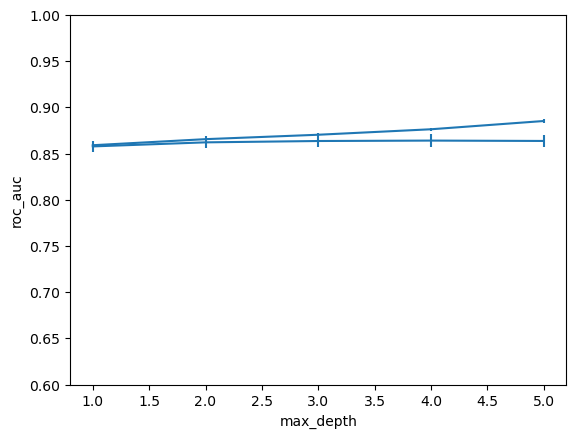

In [108]:
# plot results
results.index = gbc_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

#### Numero minimo de observaciones para partir el nodo

In [109]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    #n_estimators=[10, 20, 50, 100, 200],
    min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search.best_params_

{'min_samples_split': 0.1}

In [110]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'min_samples_split': 0.01},0.869876,0.001537,0.863523,0.006487
1,{'min_samples_split': 0.05},0.868770,0.001411,0.863555,0.006360
2,{'min_samples_split': 0.1},0.868402,0.001394,0.863594,0.006605
3,{'min_samples_split': 0.2},0.867632,0.001469,0.863312,0.006530
4,{'min_samples_split': 0.3},0.867004,0.001417,0.863340,0.006783
5,{'min_samples_split': 0.5},0.865860,0.001409,0.862775,0.006771


Text(0.5, 0, 'min_samples_split')

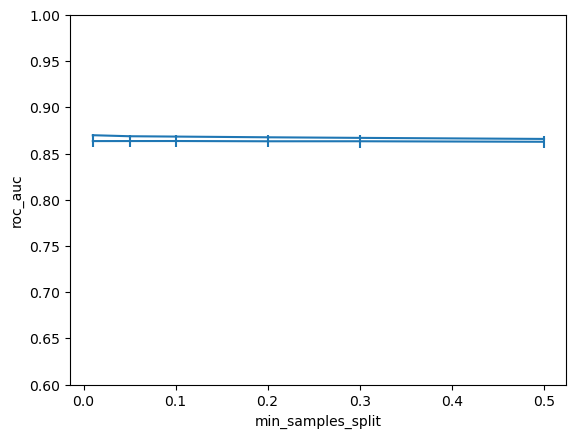

In [111]:
# plot results
results.index = gbc_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

#### RandomSearch para mejor combinacion

In [113]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc = reg_gbc.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)

# best hyperparameters
search_gbc.best_params_

{'max_depth': 4, 'min_samples_split': 0.32714402838624523, 'n_estimators': 168}

In [114]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.871072,0.001459,0.864386,0.006526
1,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.869525,0.001402,0.864380,0.006557
2,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.873603,0.001552,0.864148,0.006318
3,"{'max_depth': 4, 'min_samples_split': 0.467403...",0.868871,0.001450,0.863927,0.006481
4,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.872292,0.001475,0.863822,0.006374
5,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.869811,0.001537,0.863711,0.006376
6,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.869240,0.001408,0.863711,0.006503
7,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.868764,0.001421,0.863644,0.006479
8,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.870718,0.001675,0.863538,0.006332
9,"{'max_depth': 3, 'min_samples_split': 0.440773...",0.867906,0.001513,0.863394,0.006370


Text(0.5, 0, 'Hyperparameter space')

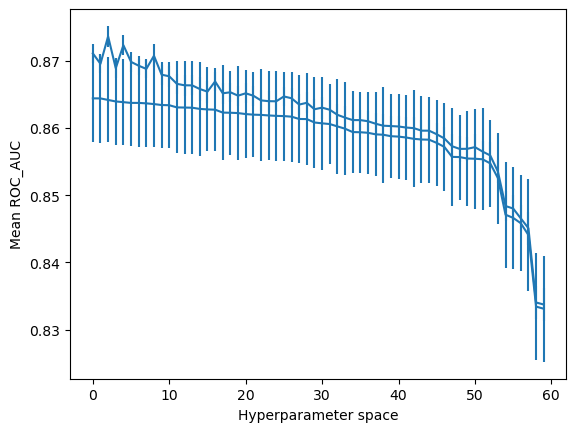

In [115]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

**Evaluemos el modelo con los mejores hiperparametros encontrados**

In [59]:
# Lo dejamos entrenado con los parámetros hallados
gbc = GradientBoostingClassifier(max_depth= 4, min_samples_split=0.32714402838624523, n_estimators=168, random_state=0)
gbc.fit(pd.concat([X_train_t_numoutscal],axis=1), y_train)
pred_train_gbc = gbc.predict_proba(pd.concat([X_train_t_numoutscal],axis=1))
pred_test_gbc = gbc.predict_proba(pd.concat([X_test_t_numoutscal],axis=1))
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]))

Train roc_auc:  0.8704931439795046
Test roc_auc:  0.8660387764146058


### 5.3.- ¿Cual es mejor?

In [117]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

Logit Test roc_auc:  0.8527270494848562 Logit Test GINI:  0.7054540989697125
RF Test roc_auc:  0.8572507193619453 RF Test GINI:  0.7145014387238906
GBC Test roc_auc:  0.8660387764146058 GBC Test GINI:  0.7320775528292116


**Se escoge el modelo de Gradient Boosting dado que tiene un mejor performance teniendo el GINI más alto**

### Metricas adicionales para evaluar el modelo

In [60]:
br_test=y_test.value_counts() / len(y_test)
br_test

Default
0    0.933156
1    0.066844
Name: count, dtype: float64

In [61]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [62]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(pd.concat([X_test_t_numoutscal],axis=1))))

Accuracy Baseline test:  0.9331555555555555
Accuracy GBC test: 0.9371111111111111


In [63]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, GBC test:',  balanced_accuracy_score(y_test,gbc.predict(pd.concat([X_test_t_numoutscal],axis=1))))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, GBC test: 0.5930117958131842


In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(y_test, gbc.predict(X_test_t_numoutscal), labels=[0,1])

array([[41581,   411],
       [ 2419,   589]], dtype=int64)

#### Gráfico de ROC

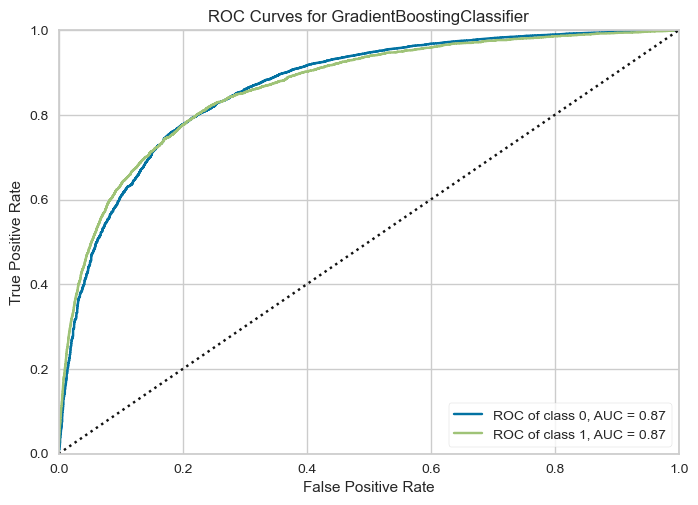

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
visualizer2 = ROCAUC(gbc, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t_numoutscal, y_test)
visualizer2.score(X_test_t_numoutscal, y_test)
visualizer2.show()

## 6.- Balanceo

In [67]:
from imblearn.under_sampling import RandomUnderSampler

In [69]:
rus = RandomUnderSampler(
    sampling_strategy='auto',
    random_state=0,
    replacement=True
)
X_train_t_numoutscal_rus, y_train_rus = rus.fit_resample(X_train_t_numoutscal, y_train)

In [73]:
X_train_t_numoutscal_rus.shape

(14036, 10)

In [74]:
# set up the model
gbc2 = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc2 = RandomizedSearchCV(gbc2, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc2 = reg_gbc2.fit(X_train_t_numoutscal_rus, y_train_rus)

# best hyperparameters
search_gbc2.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [75]:
results = pd.DataFrame(search_gbc2.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.886440,0.002572,0.864530,0.010632
1,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.875856,0.002492,0.864461,0.010332
2,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.878418,0.002476,0.864420,0.010185
3,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.875805,0.002477,0.864302,0.010190
4,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.884157,0.002551,0.864195,0.010394
5,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.877916,0.002422,0.864166,0.010397
6,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.878520,0.002069,0.864133,0.010316
7,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.880587,0.002383,0.864103,0.010395
8,"{'max_depth': 3, 'min_samples_split': 0.440773...",0.872890,0.002258,0.864064,0.009761
9,"{'max_depth': 3, 'min_samples_split': 0.441833...",0.872495,0.002293,0.864028,0.009811


Text(0.5, 0, 'Hyperparameter space')

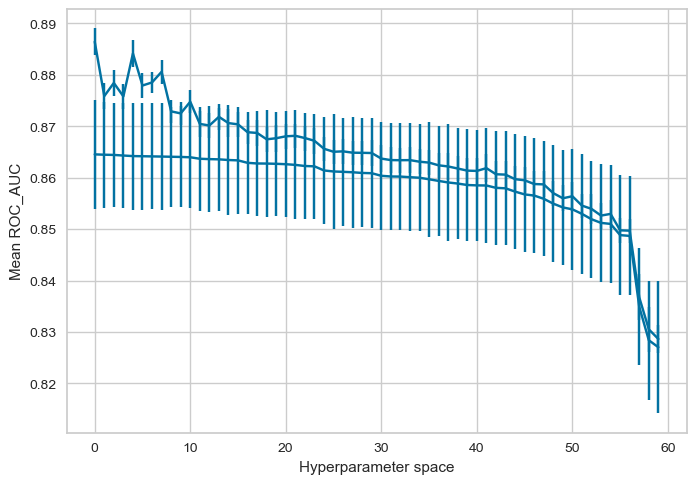

In [76]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [79]:
# Modelo GBC con Balanceo
pred_train_gbc2 = search_gbc2.predict_proba(X_train_t_numoutscal)
pred_test_gbc2 = search_gbc2.predict_proba(X_test_t_numoutscal)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc2[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_gbc2[:,1])-1)
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc2[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc2[:,1])-1)

Train roc_auc:  0.8734900158379337 GINI Train  0.7469800316758675
Test roc_auc:  0.8651096995299004 GINI Test  0.7302193990598007


**Al balancear la data obtenemos GINI muy similares al que se tuvo con la data no balanceada**

## 7.- Unboxing de modelo

In [80]:
import shap

In [81]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_t_numoutscal)
print(shap_values_bin.shape)

(45000, 10)


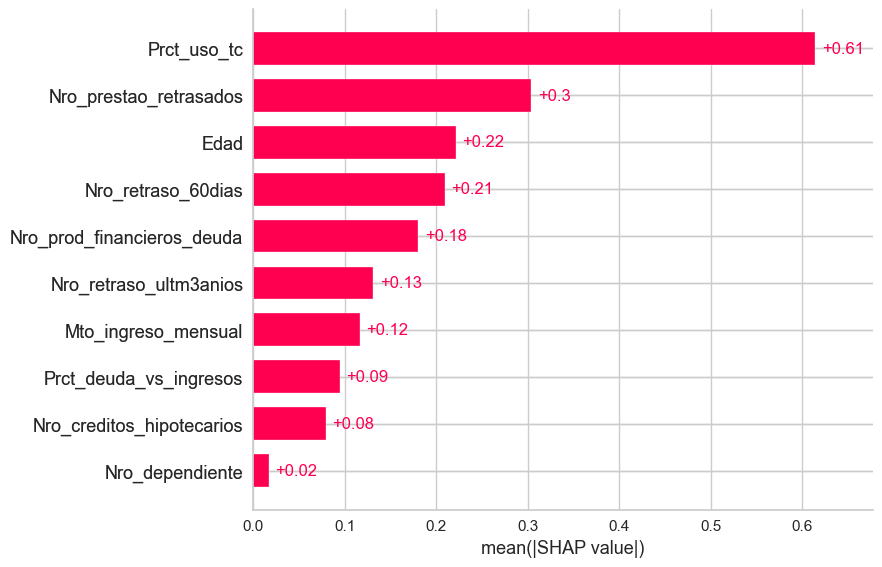

In [82]:
shap.plots.bar(shap_values_bin,max_display=30)

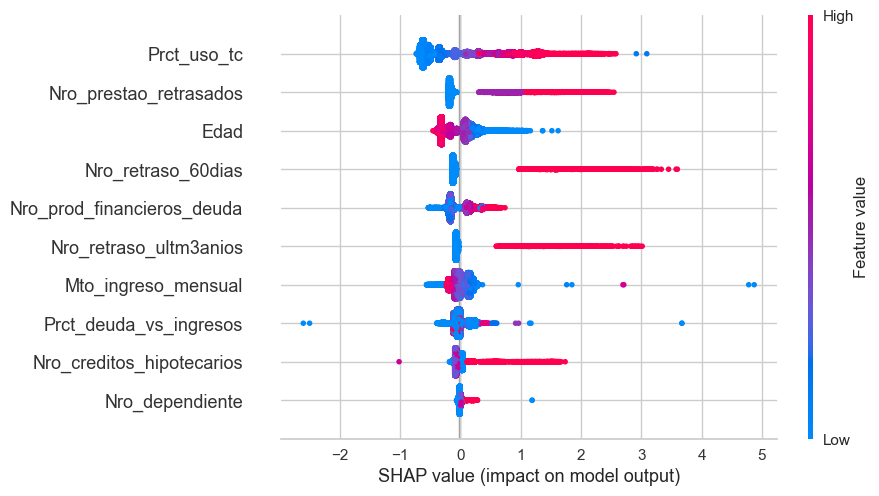

In [84]:
# Grafico para ver a nivel global los efectos de cada variable en las predicciones
# Los puntos rojos son valores altos en la variable y azul valores bajos
shap.plots.beeswarm(shap_values_bin, max_display=30)